<a href="https://colab.research.google.com/github/antonioravila/Alura-Cursos/blob/main/Python_Pandas_tratando_e_analisando_dados_(PT4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Análise VII

## Criando Agrupamentos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dados = pd.read_csv('/content/aluguel_residencial_tratado_2.csv', sep = ';')

In [ ]:
dados.head(10)

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [ ]:
dados['Valor'].mean()

5046.172821405663

In [ ]:
# Aqui selecionei somente os bairros desejados
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [ ]:
dados['Bairro'].unique()

array(['Copacabana', 'Barra da Tijuca', 'Tijuca', 'Ipanema', 'Botafogo',
       'Leblon', 'Flamengo'], dtype=object)

In [ ]:
grupo_bairro = dados.groupby('Bairro')

In [ ]:
for bairro, dados in grupo_bairro:
  print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [ ]:
# Fica claro que o método groupby armazena cada bairro como um dataframe separado
for bairro, dados in grupo_bairro:
  print(type(dados))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# A média de valor de cada bairro
grupo_bairro['Valor'].mean().round(2)

Bairro
Barra da Tijuca    7069.55
Botafogo           8791.83
Copacabana         4126.68
Flamengo           4113.53
Ipanema            9352.00
Leblon             8746.34
Tijuca             2043.52
Name: Valor, dtype: float64

In [ ]:
# Outra opção, menos rápida
for bairro, data in grupo_bairro: 
    print(f'{bairro} -> {data.Valor.mean()}')

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [ ]:
#Podemos também selecionar duas variáveis ao mesmo tempo
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatísticas Descritivas

In [ ]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [ ]:
# aqui se só desejo algumas das estatísticas descritivas
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [ ]:
# Posso renomear as colunas também
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Minimo', 'max': 'Maximo', 'sum': 'Soma'})

,Minimo,Maximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [ ]:
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

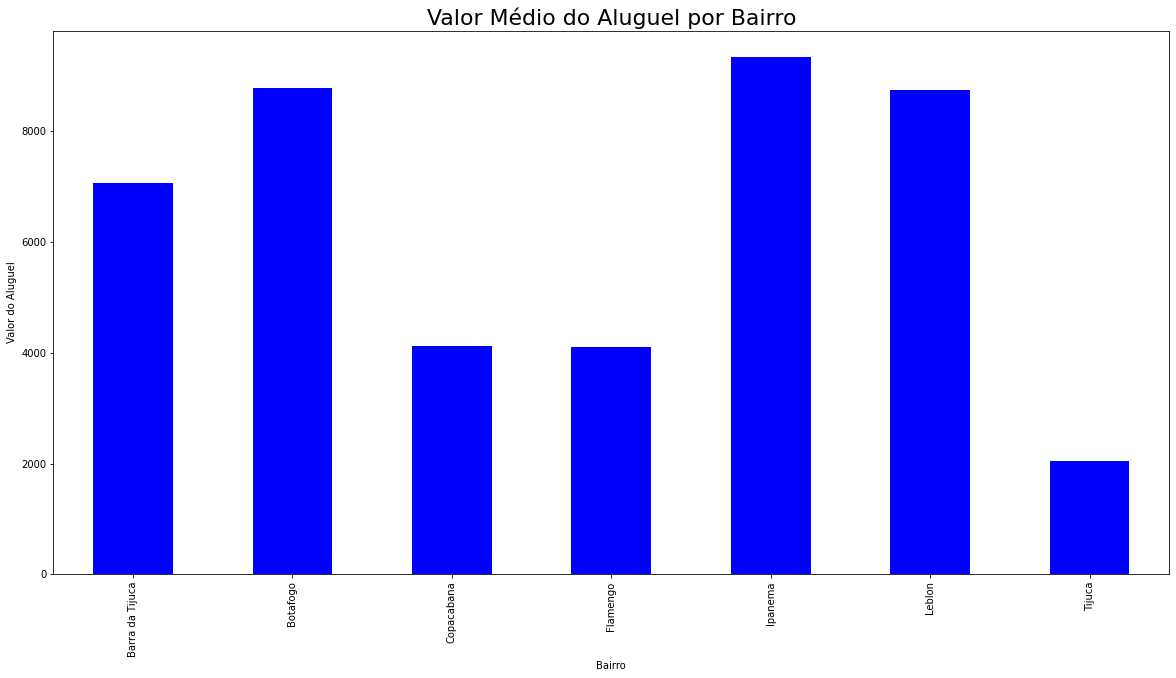

In [ ]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Máximo do Aluguel por Bairro')

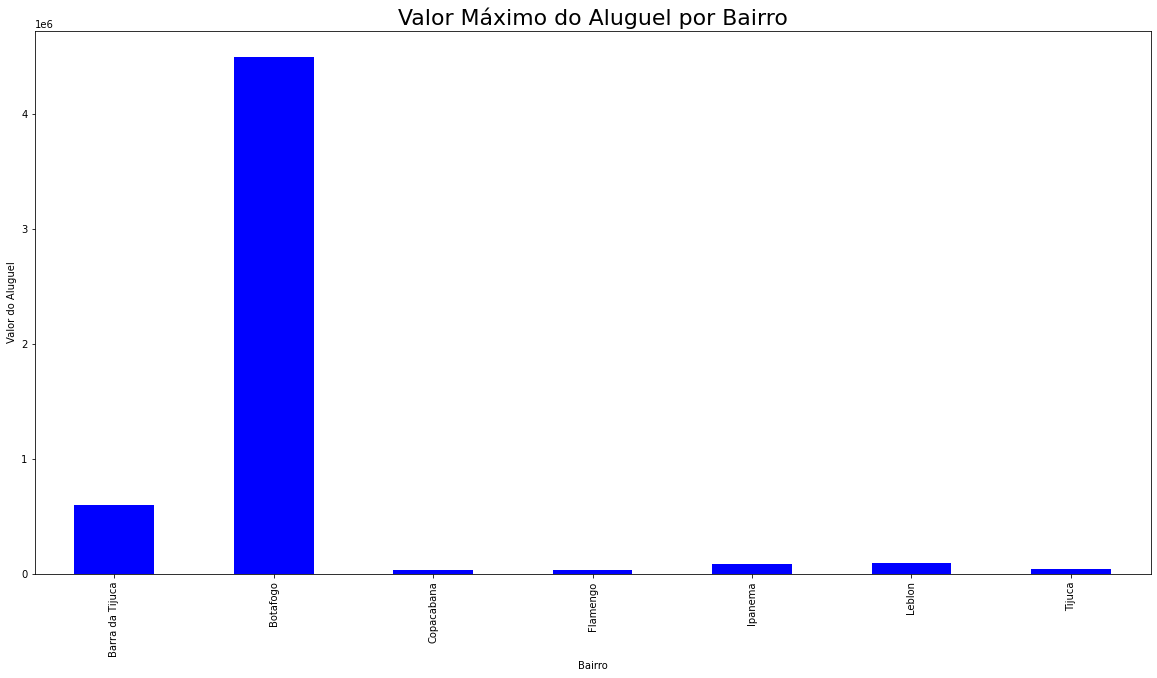

In [ ]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Minimo do Aluguel por Bairro')

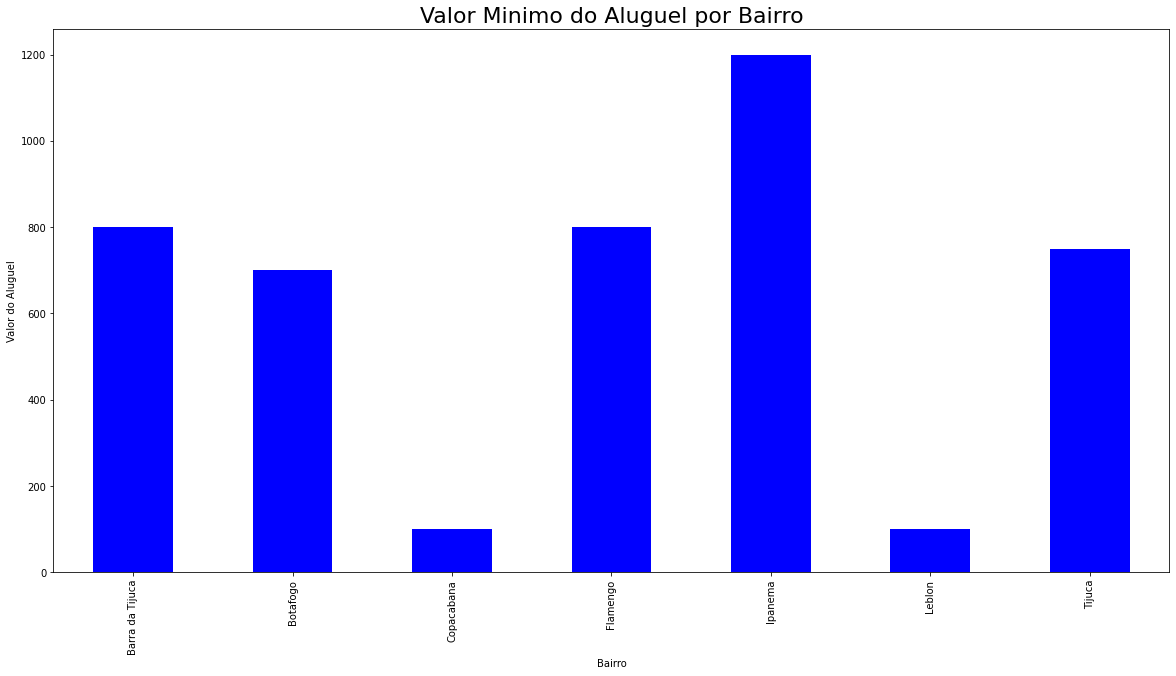

In [ ]:
fig = grupo_bairro['Valor'].min().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Minimo do Aluguel por Bairro', {'fontsize': 22})

## Faixas de valor (quantidade de quartos)

---


1 e 2, 3 e 4, 5 e 6, 7 ou mais

In [ ]:
# Primeiramente vou criar as classes de valor
classes = [0, 2, 4, 6, 100]

In [ ]:
# O primeiro parametro pede o array que vai ser usado
# o segundo pede as classes para tais cortes
quartos = pd.cut(dados['Quartos'], classes)

In [ ]:
quartos

15       (0, 2]
18       (0, 2]
20       (0, 2]
80       (0, 2]
82       (2, 4]
          ...  
21675    (0, 2]
21714    (0, 2]
21729    (0, 2]
21773    (2, 4]
21818    (0, 2]
Name: Quartos, Length: 1100, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [ ]:
pd.value_counts(quartos)

(0, 2]      650
(2, 4]      439
(4, 6]        6
(6, 100]      3
Name: Quartos, dtype: int64

In [ ]:
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais' ]

In [ ]:
quartos = pd.cut(dados.Quartos, classes, labels = labels)

In [ ]:
pd.value_counts(quartos)

1 e 2 quartos        650
3 e 4 quartos        439
5 e 6 quartos          6
7 quartos ou mais      3
Name: Quartos, dtype: int64

# Relatório de Análise VII

##Identificando e removendo Outliers

---

“Um outlier é uma observação que se diferencia tanto das demais observações que levanta suspeitas de que aquela observação foi gerada por um mecanismo distinto”

In [ ]:
dados = pd.read_csv('/content/aluguel_residencial_tratado.csv', sep = ';')

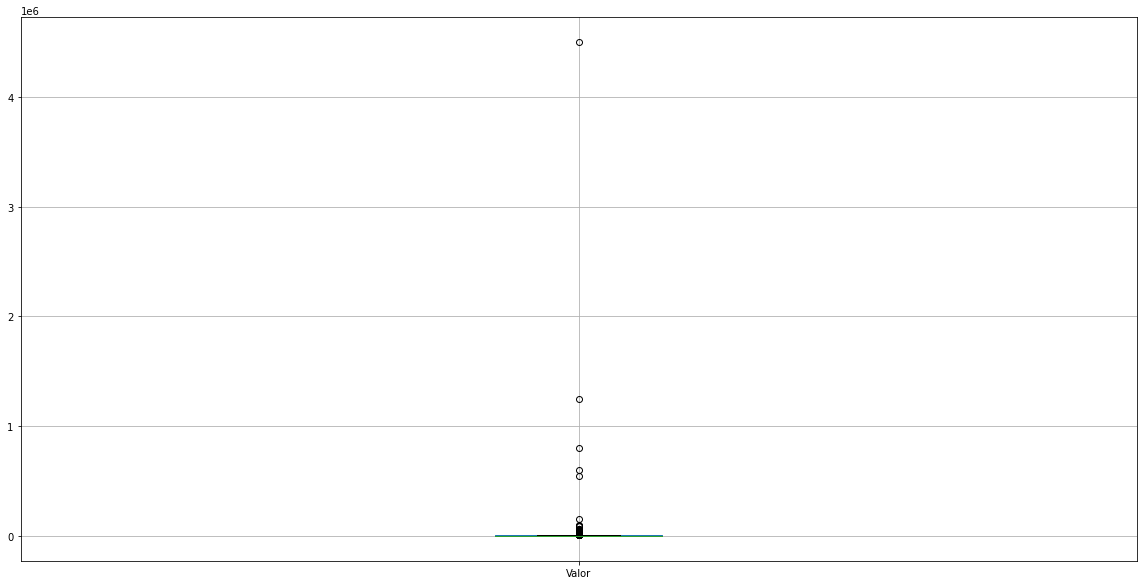

In [ ]:
# Visualização está ruim, pois temos alguns valores muito discrepante
dados.boxplot(['Valor'])

In [ ]:
# Primeiro vamos ver todos os dados maiores que  500 mil
dados.query('Valor >= 500000')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0


In [ ]:
valor = dados['Valor']

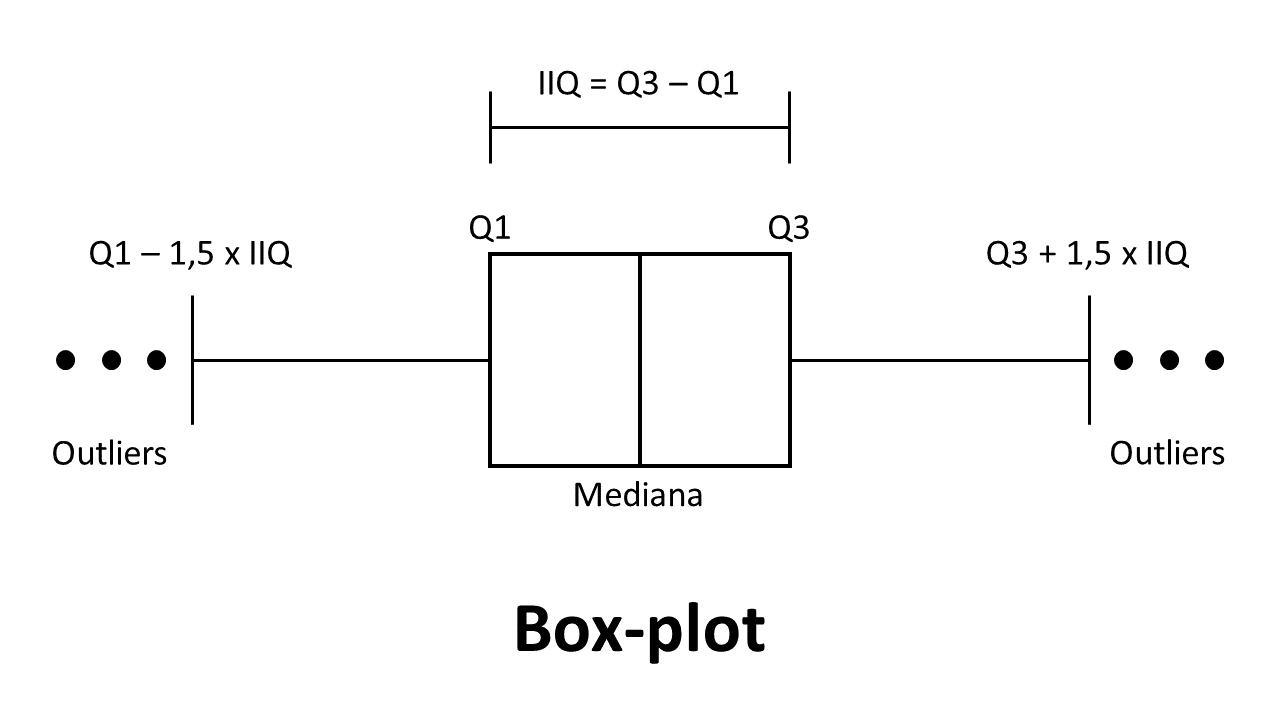

O QUE EU FIZ?

---

*   Primeiramente, retirei as medidas dos Q1 e Q3, como mostram nos gráficos
*   Depois disso, calculei a medida do IIQ, que é a diferença do Q1 para o Q3
*   Sendo assim, precisei calcular os limites inferior e superior, que representam até onde vão os dados sem os outliers
*   Apartir disso, fiz uma seleção apartir desses limites, e utilizei essa para retirar os dados discrepantes   




In [ ]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.3 * IIQ

In [ ]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

In [ ]:
dados_new = dados[selecao]

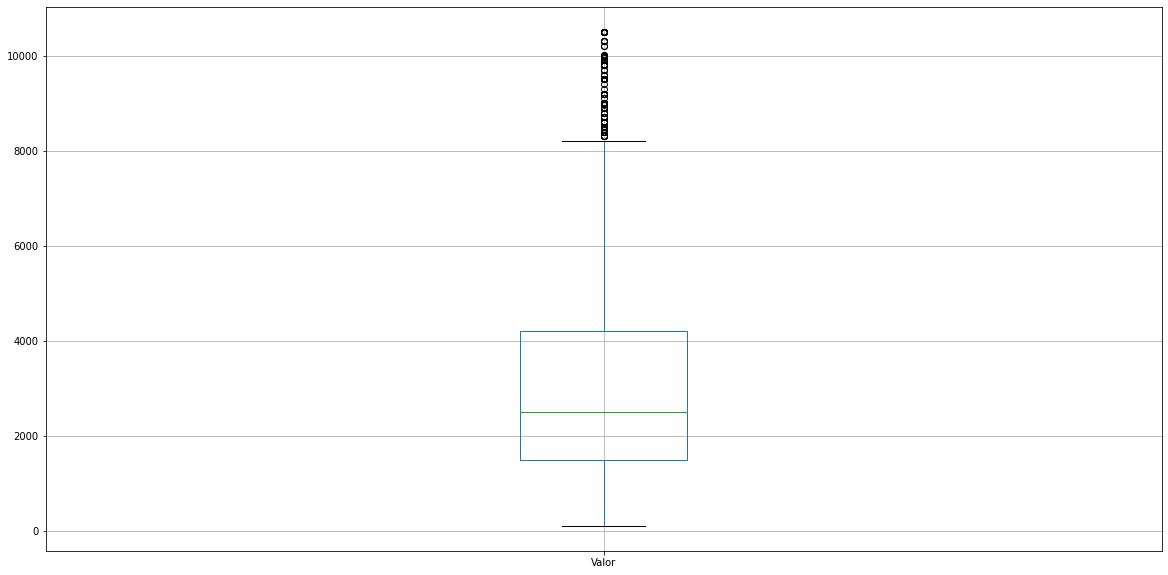

In [ ]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ff45f9210>]],
      dtype=object)

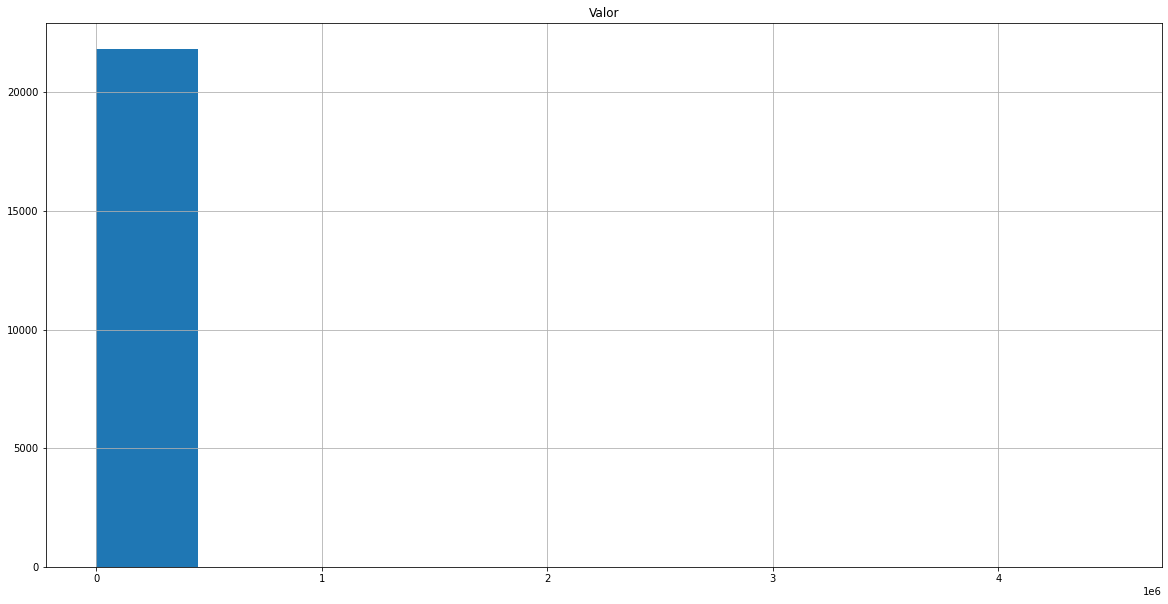

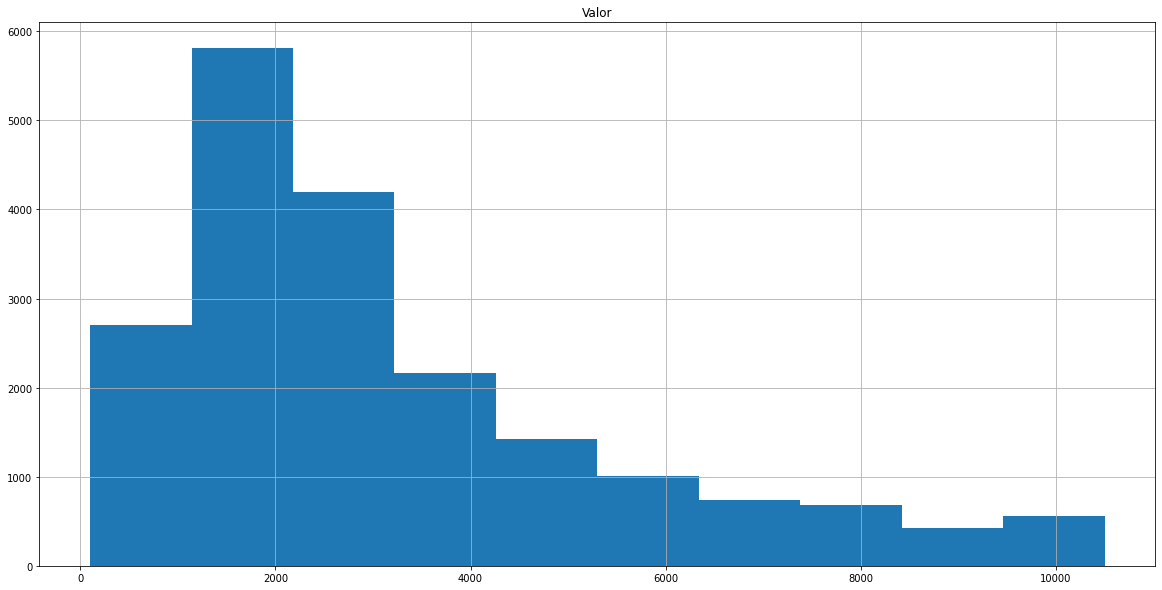

In [ ]:
# Esses dois histogramas mostra a diferença na distribuição dos dados com e sem os antigos outliers
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e removendo Outliers (continuação)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


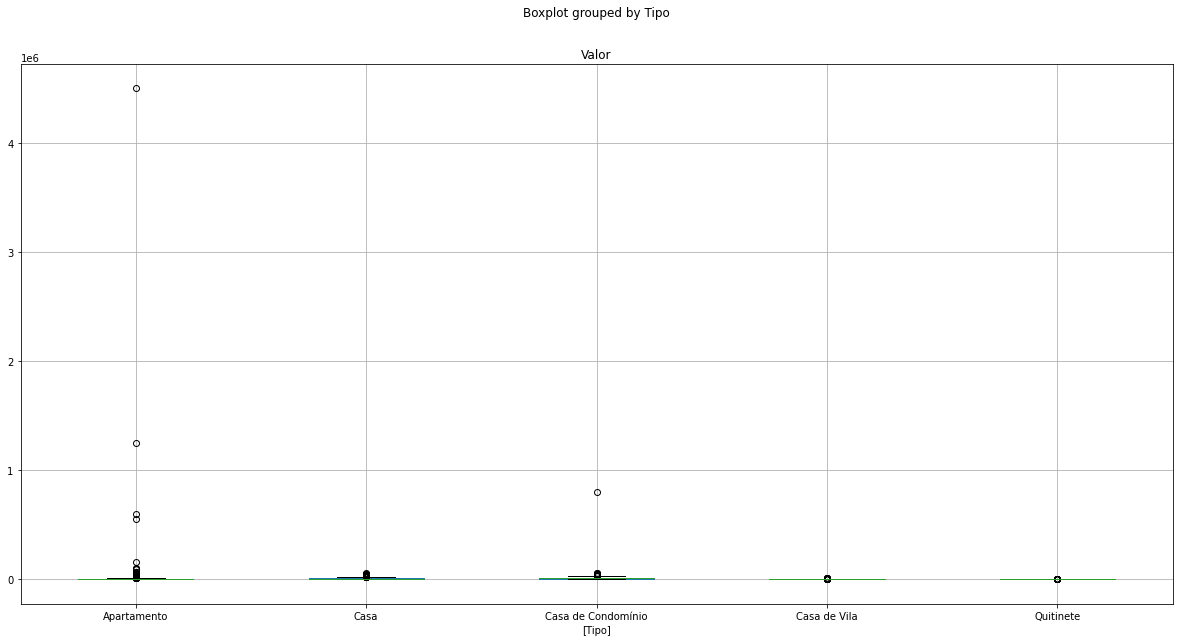

In [ ]:
# A mesma seleção anterior, com os outliers, por grupo
dados.boxplot(['Valor'], by=['Tipo'])

In [ ]:
"""
- O objetivo será tirar outliers se baseando no boxplot de cada tipo
- É importante lembrar que se for feito um boxplot para cada tipo, 
algumas particularidades podem ser ignoradas
- Enquanto um valor pode aparecer como um outlier no boxplot geral, alguns 
desses podem não ser discrepantes se isolados em sua análise particular de cada
"""

'\n- O objetivo será tirar outliers se baseando no boxplot de cada tipo\n- É importante lembrar que se for feito um boxplot para cada tipo, \nalgumas particularidades podem ser ignoradas\n- Enquanto um valor pode aparecer como um outlier no boxplot geral, alguns \ndesses podem não ser discrepantes se isolados em sua análise particular de cada\n'

In [ ]:
#Agrupando por tipo somente na variável "Valor"
grupo_tipo = dados.groupby('Tipo')['Valor']

In [ ]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [ ]:
for tipo, data in grupo_tipo:
  print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [ ]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.3 * IIQ

In [ ]:
#nota-se que os valores agoras são separados por tipo
limite_superior

Tipo
Apartamento            9290.0
Casa                  21110.0
Casa de Condomínio    29875.0
Casa de Vila           3165.0
Quitinete              2280.0
Name: Valor, dtype: float64

In [ ]:
limite_superior['Apartamento']

9290.0

In [ ]:
# o método .keys() pega as chaves do dicionario

dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


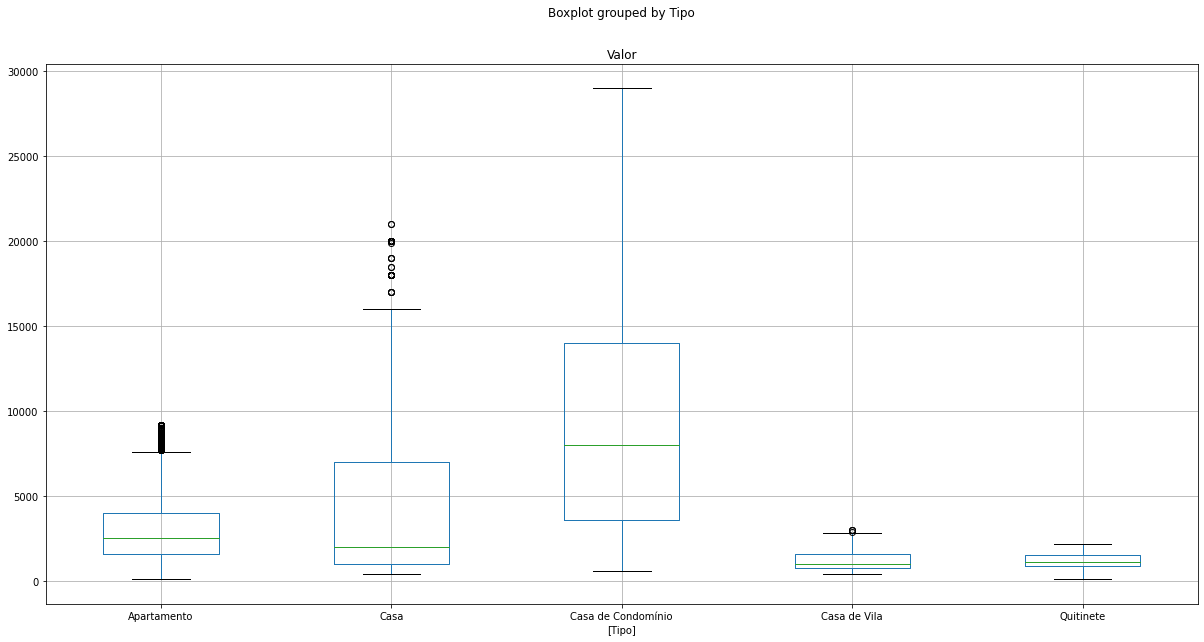

In [ ]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [ ]:
dados_new.to_csv('/content/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)
dados_extra = pd.read_csv('/content/aluguel_residencial_sem_outliers.csv', sep = ';')
dados_extra.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


#(EXTRA) Mais sobre gráficos

In [ ]:
%matplotlib inline
plt.rc('figure', figsize = (15,8))

In [ ]:
dados_extra.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


O objetivo aqui é criar uma visualização de 4 gráficos juntos

In [ ]:
# primeiro criamos essa variavel
area = plt.figure()

<Figure size 1080x576 with 0 Axes>

In [ ]:
# depois criamos as variáveis de cada gráfico
# os parametro significam o numero de linhas e colunas (2 linhas * 2 colunas = 4 gráficos)
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [ ]:
g1.scatter(dados_extra['Valor'], dados_extra['Area'])
g1.set_title('Valor X Área')

Text(0.5, 1.0, 'Valor X Área')

In [ ]:
g2.hist(dados_extra['Valor'])
g2.set_title('Histograma')

Text(0.5, 1.0, 'Histograma')

In [ ]:
# Esse método .sample() pega registros aleatórios
# entretante deixa o index fora de ordem
dados_g3 = dados_extra.Valor.sample(100) 
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

Text(0.5, 1.0, 'Amostra (Valor)')

In [ ]:
grupo = dados_extra.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

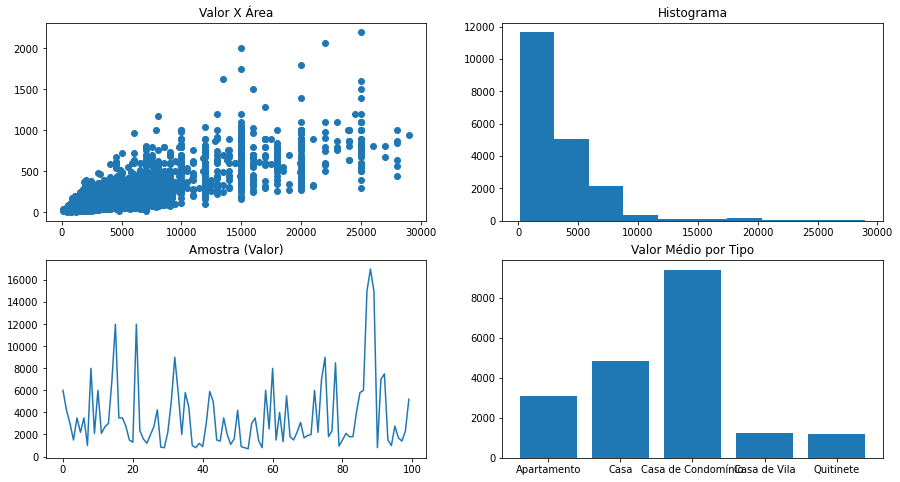

In [ ]:
area

In [ ]:
# O ultimo parametro retira o máximo possível da borda branca ao redor
area.savefig('gráfico.png', dpi = 300, bboc_inches = 'tight')